# Analysing Data

The following task shows how to analysie data acceed through API and stored in .json format

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import spearmanr

plt.rc('axes',edgecolor='k')
%matplotlib inline

### Openning .json file 

In [258]:
with open('data.json', 'r') as fp:
    data = json.load(fp)
data

{'100.0': {'Archaea:Crenarchaeota': 1.5335566104853263e-06,
  'Archaea:Euryarchaeota': 8.480343520374728e-06,
  'Bacteria:AD3': 4.435457615920241e-08,
  'Bacteria:Acidobacteria': 3.6188060897437236e-08,
  'Bacteria:Actinobacteria': 4.375279058362686e-06,
  'Bacteria:BHI80-139': 3.13429904087009e-07,
  'Bacteria:BRC1': 2.2177288079601205e-08,
  'Bacteria:Bacteroidetes': 1.4914267061445419e-06,
  'Bacteria:Chlamydiae': 6.046825200944167e-08,
  'Bacteria:Chlorobi': 6.751448789633433e-08,
  'Bacteria:Chloroflexi': 2.6078932382703516e-06,
  'Bacteria:Cyanobacteria': 5.184143181614833e-06,
  'Bacteria:FCPU426': 5.1372833665398765e-08,
  'Bacteria:Fibrobacteres': 2.2177288079601205e-08,
  'Bacteria:Firmicutes': 9.784763033121163e-08,
  'Bacteria:GN02': 1.1790469790420239e-07,
  'Bacteria:GN04': 5.1372833665398765e-08,
  'Bacteria:GOUTA4': 5.1372833665398765e-08,
  'Bacteria:Gemmatimonadetes': 3.7757587949083246e-07,
  'Bacteria:KSB3': 2.2177288079601205e-08,
  'Bacteria:LCP-89': 5.13728336653

In [259]:
data.items()

dict_items([('25.0', {'Bacteria:Proteobacteria': 3.6069983060860936e-06, 'Bacteria:WS3': 2.786268335162039e-08, 'Bacteria:Cyanobacteria': 1.6551575993332143e-05, 'Bacteria:SAR406': 7.266039340242523e-06, 'Bacteria:Firmicutes': 2.8773371701026925e-07, 'Bacteria:Bacteroidetes': 1.4416066926874579e-06, 'Archaea:Euryarchaeota': 1.0655570036305709e-05, 'Bacteria:Verrucomicrobia': 1.3859984887573495e-06, 'Bacteria:Chlamydiae': 4.3648632723626306e-08, 'Bacteria:Actinobacteria': 3.5377474992136654e-06, 'Bacteria:Planctomycetes': 6.01282329608303e-07, 'Bacteria:SBR1093': 9.015584892701995e-07, 'Bacteria:Gemmatimonadetes': 2.4265157633755684e-07, 'Bacteria:Lentisphaerae': 1.1256228099820371e-07, 'Bacteria:PAUC34f': 3.250434932988258e-07, 'Bacteria:ZB3': 1.6419252990516485e-07, 'Bacteria:AD3': 6.081723512497847e-08, 'Bacteria:Tenericutes': 1.83766490796169e-07, 'Bacteria:BHI80-139': 7.852148124748662e-08, 'Bacteria:Chloroflexi': 3.0675380605426125e-06, 'Archaea:Crenarchaeota': 2.160389821507764e-

In [260]:
data.keys()

dict_keys(['25.0', '5.0', '188.0', '40.0', '488.0', '696.0', '60.0', '375.0', '270.0', '450.0', '600.0', '17.0', '65.0', '380.0', '640.0', '80.0', '790.0', '45.0', '800.0', '700.0', '75.0', '120.0', '590.0', '340.0', '1000.0', '50.0', '350.0', '55.0', '177.0', '480.0', '150.0', '115.0', '30.0', '140.0', '66.0', '250.0', '850.0', '100.0', '550.0', '70.0', '90.0', '155.0', '650.0', '125.0', '35.0', '740.0'])

In [261]:
data.values()

dict_values([{'Bacteria:Proteobacteria': 3.6069983060860936e-06, 'Bacteria:WS3': 2.786268335162039e-08, 'Bacteria:Cyanobacteria': 1.6551575993332143e-05, 'Bacteria:SAR406': 7.266039340242523e-06, 'Bacteria:Firmicutes': 2.8773371701026925e-07, 'Bacteria:Bacteroidetes': 1.4416066926874579e-06, 'Archaea:Euryarchaeota': 1.0655570036305709e-05, 'Bacteria:Verrucomicrobia': 1.3859984887573495e-06, 'Bacteria:Chlamydiae': 4.3648632723626306e-08, 'Bacteria:Actinobacteria': 3.5377474992136654e-06, 'Bacteria:Planctomycetes': 6.01282329608303e-07, 'Bacteria:SBR1093': 9.015584892701995e-07, 'Bacteria:Gemmatimonadetes': 2.4265157633755684e-07, 'Bacteria:Lentisphaerae': 1.1256228099820371e-07, 'Bacteria:PAUC34f': 3.250434932988258e-07, 'Bacteria:ZB3': 1.6419252990516485e-07, 'Bacteria:AD3': 6.081723512497847e-08, 'Bacteria:Tenericutes': 1.83766490796169e-07, 'Bacteria:BHI80-139': 7.852148124748662e-08, 'Bacteria:Chloroflexi': 3.0675380605426125e-06, 'Archaea:Crenarchaeota': 2.160389821507764e-06, 'Bac

### Accessing data directly from .json

In [262]:
#Firmicutes
list_firmicutes = []
for deep in data:
    for bacteria in data[deep]:
        if ("Firmicutes" in bacteria):
            dict_firmicutes = {'name': bacteria, 'conc' : data[deep][bacteria], 'deep' : float(deep)}
            list_firmicutes.append(dict_firmicutes)         
deeps_firmicutes = []
concs_firmicutes = []
for bacteria in list_firmicutes:
    deeps_firmicutes.append(bacteria['deep'])
    concs_firmicutes.append(bacteria['conc'])
    

#Cyanobacteria
list_cyanobacteria = []
for deep in data:
    for bacteria in data[deep]:
        if ("Cyanobacteria" in bacteria):
            dict_cyanobacteria = {'name': bacteria, 'conc' : data[deep][bacteria], 'deep' : float(deep)}
            list_cyanobacteria.append(dict_cyanobacteria)                   
deeps_cyanobacteria = []
concs_cyanobacteria = []
for bacteria in list_cyanobacteria:
    deeps_cyanobacteria.append(bacteria['deep'])
    concs_cyanobacteria.append(bacteria['conc'])

### Estimating Spearman Correlation

The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

rho : float or ndarray (2-D square)
Spearman correlation matrix or correlation coefficient (if only 2 variables are given as parameters. Correlation matrix is square with length equal to total number of variables (columns or rows) in a and b combined.

p-value : float
The two-sided p-value for a hypothesis test whose null hypothesis is that two sets of data are uncorrelated, has same dimension as rho.

In [310]:
#Ex 1: cyanobacteria
rho, p = spearmanr(deeps_cyanobacteria, concs_cyanobacteria )
print ('- Spearman''´s' ' coefficients for cyanobacteria:')
print('rho_cyanobacteria:', rho)
print('p_cyanobacteria:',p)

#Ex 2: firmicutes
rho, p = spearmanr(deeps_firmicutes, concs_firmicutes )
print ('- Spearman''´s' ' coefficients for firmicutes:')
print('rho_firmicutes:', rho)
print('p_firmicutes:',p)

- Spearman´s coefficients for cyanobacteria:
rho_cyanobacteria: -0.7091581868640147
p_cyanobacteria: 3.4655084350363494e-08
- Spearman´s coefficients for firmicutes:
rho_firmicutes: -0.555349984582177
p_firmicutes: 6.175394683491683e-05


### Plotting Data

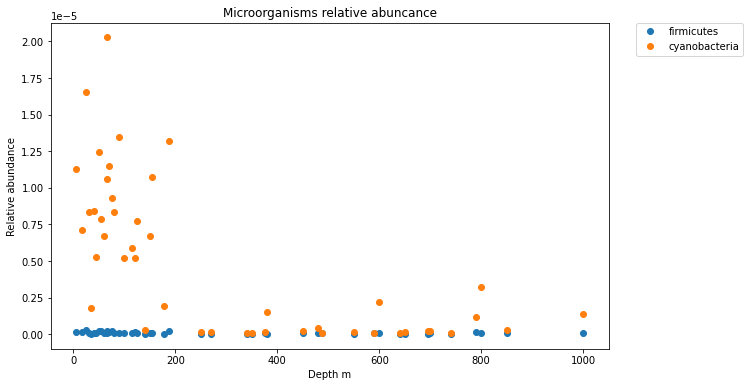

In [264]:
plt.figure(figsize=(10,6))
plt.plot(deeps_firmicutes, concs_firmicutes,'o', label='firmicutes')
plt.plot(deeps_cyanobacteria, concs_cyanobacteria,'o', label='cyanobacteria')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Depth m")
plt.ylabel("Relative abundance")
plt.title('Microorganisms relative abuncance')
plt.show()

### Converting dictionary from .json file in a list to better exploit data

In [265]:
list_bact = []
for deep in data:
    for bacteria in data[deep]:
        dict_bact = {'name': bacteria, 'conc' : data[deep][bacteria], 'deep' : float(deep)}
        list_bact.append(dict_bact)
print(list_bact)


[{'name': 'Bacteria:Proteobacteria', 'conc': 3.6069983060860936e-06, 'deep': 25.0}, {'name': 'Bacteria:WS3', 'conc': 2.786268335162039e-08, 'deep': 25.0}, {'name': 'Bacteria:Cyanobacteria', 'conc': 1.6551575993332143e-05, 'deep': 25.0}, {'name': 'Bacteria:SAR406', 'conc': 7.266039340242523e-06, 'deep': 25.0}, {'name': 'Bacteria:Firmicutes', 'conc': 2.8773371701026925e-07, 'deep': 25.0}, {'name': 'Bacteria:Bacteroidetes', 'conc': 1.4416066926874579e-06, 'deep': 25.0}, {'name': 'Archaea:Euryarchaeota', 'conc': 1.0655570036305709e-05, 'deep': 25.0}, {'name': 'Bacteria:Verrucomicrobia', 'conc': 1.3859984887573495e-06, 'deep': 25.0}, {'name': 'Bacteria:Chlamydiae', 'conc': 4.3648632723626306e-08, 'deep': 25.0}, {'name': 'Bacteria:Actinobacteria', 'conc': 3.5377474992136654e-06, 'deep': 25.0}, {'name': 'Bacteria:Planctomycetes', 'conc': 6.01282329608303e-07, 'deep': 25.0}, {'name': 'Bacteria:SBR1093', 'conc': 9.015584892701995e-07, 'deep': 25.0}, {'name': 'Bacteria:Gemmatimonadetes', 'conc':

### Transforming list in dataframe and organizing data

In [266]:
bacteria = pd.DataFrame(list_bact) 
dataset = bacteria['name'].str.split(':', expand=True)
dataset = bacteria.join(dataset).rename(columns={0:'class', 1:'phylum'})
dataset.drop(['name'], axis=1, inplace=True)
dataset

conc   deep     class            phylum
0     3.606998e-06   25.0  Bacteria    Proteobacteria
1     2.786268e-08   25.0  Bacteria               WS3
2     1.655158e-05   25.0  Bacteria     Cyanobacteria
3     7.266039e-06   25.0  Bacteria            SAR406
4     2.877337e-07   25.0  Bacteria        Firmicutes
5     1.441607e-06   25.0  Bacteria     Bacteroidetes
6     1.065557e-05   25.0   Archaea     Euryarchaeota
7     1.385998e-06   25.0  Bacteria   Verrucomicrobia
8     4.364863e-08   25.0  Bacteria        Chlamydiae
9     3.537747e-06   25.0  Bacteria    Actinobacteria
10    6.012823e-07   25.0  Bacteria    Planctomycetes
11    9.015585e-07   25.0  Bacteria           SBR1093
12    2.426516e-07   25.0  Bacteria  Gemmatimonadetes
13    1.125623e-07   25.0  Bacteria     Lentisphaerae
14    3.250435e-07   25.0  Bacteria           PAUC34f
15    1.641925e-07   25.0  Bacteria               ZB3
16    6.081724e-08   25.0  Bacteria               AD3
17    1.837665e-07   25.0  Bacteria       Tenericutes
18    7.852148e-08   25.0  Bacteria         BHI80-139
19    3.067538e-06   25.0  Bacteria       Chloroflexi
20    2.160390e-06   25.0   Archaea     Crenarchaeota
21    5.162088e-08   25.0  Bacteria              GN02
22    8.845369e-08   25.0  Bacteria      Spirochaetes
23    3.322818e-08   25.0  Bacteria            Thermi
24    2.138001e-08   25.0  Bacteria     Acidobacteria
25    1.661409e-08   25.0  Bacteria             NKB19
26    1.692029e-08   25.0  Bacteria          Chlorobi
27    2.276452e-08   25.0  Bacteria     Fibrobacteres
28    3.322818e-08   25.0  Bacteria      Poribacteria
29    1.722649e-08   25.0  Bacteria        Caldithrix
...            ...    ...       ...               ...
1717  6.646515e-06  740.0   Archaea     Euryarchaeota
1718  6.609658e-07  740.0  Bacteria    Actinobacteria
1719  5.162606e-07  740.0  Bacteria     Bacteroidetes
1720  8.581113e-07  740.0  Bacteria    Planctomycetes
1721  2.459799e-08  740.0  Bacteria        Firmicutes
1722  1.393886e-08  740.0  Bacteria              BRC1
1723  7.767044e-07  740.0  Bacteria     Acidobacteria
1724  4.460436e-07  740.0  Bacteria       Nitrospirae
1725  1.782244e-05  740.0   Archaea     Crenarchaeota
1726  2.090829e-08  740.0  Bacteria        Chlamydiae
1727  1.007083e-06  740.0  Bacteria  Gemmatimonadetes
1728  9.757204e-08  740.0  Bacteria      Poribacteria
1729  8.650295e-07  740.0  Bacteria   Verrucomicrobia
1730  9.405248e-06  740.0  Bacteria            SAR406
1731  3.717030e-08  740.0  Bacteria      Spirochaetes
1732  2.160524e-07  740.0  Bacteria               OD1
1733  4.526329e-06  740.0  Bacteria       Chloroflexi
1734  1.022183e-07  740.0  Bacteria     Cyanobacteria
1735  1.637816e-07  740.0  Bacteria               TM7
1736  7.434060e-08  740.0  Bacteria     Lentisphaerae
1737  2.648384e-07  740.0  Bacteria             AncK6
1738  3.136244e-06  740.0  Bacteria           PAUC34f
1739  2.787773e-08  740.0  Bacteria     Fibrobacteres
1740  1.393886e-08  740.0  Bacteria       Tenericutes
1741  1.393886e-08  740.0  Bacteria             NKB19
1742  5.575545e-08  740.0  Bacteria             WPS-2
1743  6.969432e-08  740.0  Bacteria            TPD-58
1744  1.393886e-08  740.0  Bacteria              KSB3
1745  5.296768e-07  740.0  Bacteria               ZB3
1746  8.363318e-08  740.0  Bacteria              GN02

[1747 rows x 4 columns]

### Getting information about dataset

In [267]:
dataset.describe()

conc         deep
count  1.747000e+03  1747.000000
mean   1.515563e-06   318.812822
std    3.642143e-06   284.010533
min    1.176465e-08     5.000000
25%    3.717400e-08    66.000000
50%    1.158051e-07   188.000000
75%    1.100039e-06   590.000000
max    4.324894e-05  1000.000000

In [268]:
dataset['phylum'].describe()

count              1747
unique               73
top       Bacteroidetes
freq                 46
Name: phylum, dtype: object

In [269]:
print(dataset['phylum'].describe()['unique'], 'phylum were identified in the analysis.')

73 phylum were identified in the analysis.


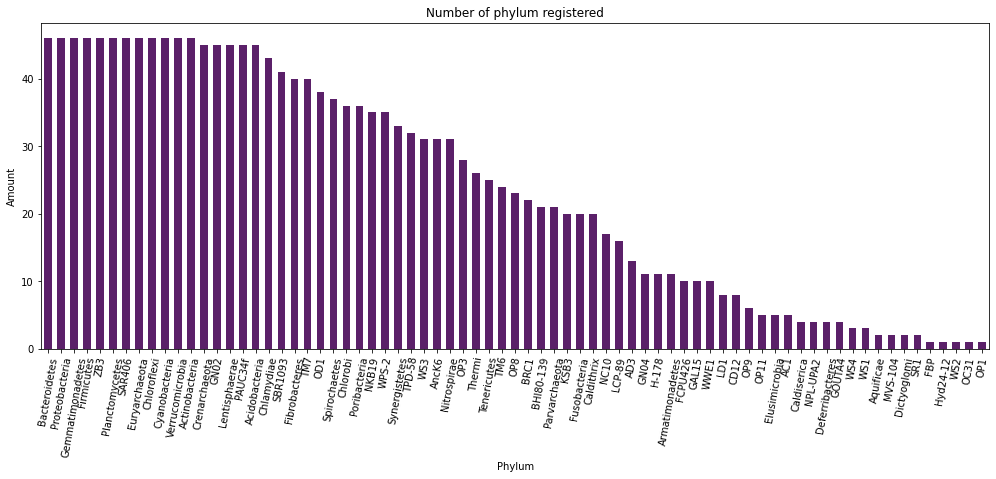

In [270]:
dataset['phylum'].value_counts().plot('bar', colormap='viridis', width=0.6, alpha=0.88, figsize=(17,6))
plt.xticks(rotation=80)
plt.ylabel('Amount')
plt.xlabel('Phylum')
plt.title('Number of phylum registered')
plt.show()

In [271]:
dataset['deep'].describe()

count    1747.000000
mean      318.812822
std       284.010533
min         5.000000
25%        66.000000
50%       188.000000
75%       590.000000
max      1000.000000
Name: deep, dtype: float64

In [272]:
print('Sample were colected in a depth between',
      dataset['deep'].describe()['min'],'and',
      dataset['deep'].describe()['max'], 'meters.')

Sample were colected in a depth between 5.0 and 1000.0 meters.


In [273]:
dataset['conc'].describe()

count    1.747000e+03
mean     1.515563e-06
std      3.642143e-06
min      1.176465e-08
25%      3.717400e-08
50%      1.158051e-07
75%      1.100039e-06
max      4.324894e-05
Name: conc, dtype: float64

In [274]:
print('The realative abuncance was between',
      dataset['conc'].describe()['min'],'and',
      dataset['conc'].describe()['max'], '.')

The realative abuncance was between 1.1764649550442742e-08 and 4.324894468583804e-05 .


In [275]:
#Takeing data of microorgamins abundance acording to the depth
dataset.groupby('deep').agg({'conc': ['mean', 'min', 'max']})

conc                        
                mean           min       max
deep                                        
5.0     8.074834e-07  1.452259e-08  0.000011
17.0    1.277785e-06  1.567690e-08  0.000011
25.0    1.710380e-06  1.661409e-08  0.000017
30.0    1.515913e-06  2.363029e-08  0.000020
35.0    6.180932e-07  1.354883e-08  0.000005
40.0    1.081016e-06  1.176465e-08  0.000012
45.0    1.260324e-06  1.659333e-08  0.000008
50.0    1.432758e-06  1.278192e-08  0.000013
55.0    2.776057e-06  5.427865e-08  0.000011
60.0    1.110608e-06  1.396336e-08  0.000015
65.0    3.362992e-06  2.726461e-08  0.000030
66.0    1.410721e-06  1.515482e-08  0.000011
70.0    1.840189e-06  2.613246e-08  0.000011
75.0    1.677259e-06  1.501723e-08  0.000013
80.0    1.749582e-06  1.470133e-08  0.000016
90.0    1.563212e-06  1.312073e-08  0.000013
100.0   1.375407e-06  2.217729e-08  0.000010
115.0   1.194840e-06  1.301951e-08  0.000009
120.0   2.159006e-06  1.422559e-08  0.000018
125.0   1.751029e-06  1.551473e-08  0.000013
140.0   1.115130e-06  1.417571e-08  0.000017
150.0   2.240310e-06  4.096330e-08  0.000016
155.0   1.387958e-06  1.357065e-08  0.000011
177.0   1.427400e-06  2.093213e-08  0.000019
188.0   2.263779e-06  3.028787e-08  0.000013
250.0   1.703459e-06  1.587842e-08  0.000018
270.0   1.180052e-06  2.719678e-08  0.000021
340.0   9.281093e-07  2.883587e-08  0.000020
350.0   1.846221e-06  1.309778e-08  0.000021
375.0   1.388804e-06  5.140104e-08  0.000025
380.0   1.209163e-06  1.381819e-08  0.000017
450.0   1.574861e-06  5.745795e-08  0.000023
480.0   1.993425e-06  2.254848e-08  0.000043
488.0   1.398292e-06  1.507686e-08  0.000023
550.0   1.407727e-06  1.366042e-08  0.000013
590.0   1.595479e-06  1.485784e-08  0.000023
600.0   1.397937e-06  1.535242e-08  0.000019
640.0   1.520342e-06  1.514094e-08  0.000026
650.0   1.610505e-06  1.295256e-08  0.000029
696.0   1.295355e-06  1.758269e-08  0.000019
700.0   1.997931e-06  1.639442e-08  0.000025
740.0   1.645158e-06  1.393886e-08  0.000018
790.0   2.278801e-06  2.021313e-08  0.000020
800.0   1.107967e-06  1.459157e-08  0.000022
850.0   1.430654e-06  1.434183e-08  0.000024
1000.0  1.497105e-06  1.328692e-08  0.000025

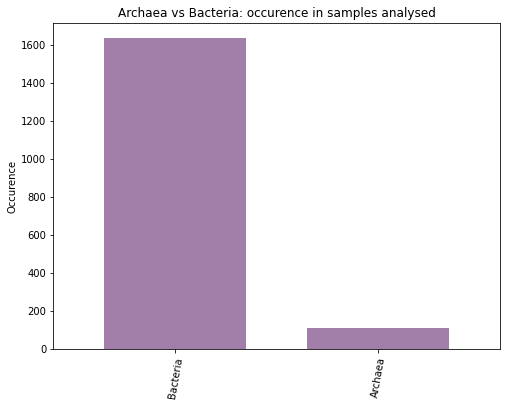

In [276]:
dataset['class'].value_counts().plot('bar', colormap='viridis', width=0.7, alpha=0.5, figsize=(8,6))
plt.xticks(rotation=80)
plt.ylabel('Occurence')
#plt.xlabel('Phylum')
plt.title('Archaea vs Bacteria: occurence in samples analysed')
plt.show()

In [277]:
dataset.groupby('class')['deep'].count()

class
Archaea      112
Bacteria    1635
Name: deep, dtype: int64

In [278]:
dataset.groupby('phylum')['deep'].count()

phylum
AC1                 5
AD3                13
Acidobacteria      45
Actinobacteria     46
AncK6              31
Aquificae           2
Armatimonadetes    11
BHI80-139          21
BRC1               22
Bacteroidetes      46
CD12                8
Caldiserica         4
Caldithrix         20
Chlamydiae         43
Chlorobi           36
Chloroflexi        46
Crenarchaeota      45
Cyanobacteria      46
Deferribacteres     4
Dictyoglomi         2
Elusimicrobia       5
Euryarchaeota      46
FBP                 1
FCPU426            10
Fibrobacteres      40
Firmicutes         46
Fusobacteria       20
GAL15              10
GN02               45
GN04               11
                   ..
OC31                1
OD1                38
OP1                 1
OP11                5
OP3                28
OP8                23
OP9                 6
PAUC34f            45
Parvarchaeota      21
Planctomycetes     46
Poribacteria       36
Proteobacteria     46
SAR406             46
SBR1093            41
SR1

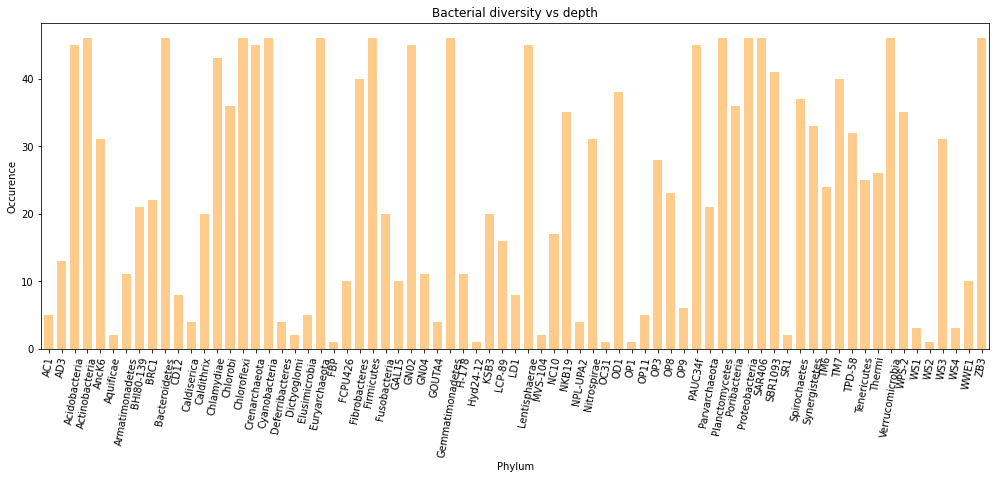

In [279]:
dataset.groupby('phylum')['deep'].count().plot('bar', 
                                                    colormap='copper_r', 
                                                    width=0.7, alpha=0.9, 
                                                    figsize=(17,6))
plt.ylabel('Occurence')
plt.xlabel('Phylum')
plt.xticks(rotation=80)
plt.title('Bacterial diversity vs depth')
plt.show()

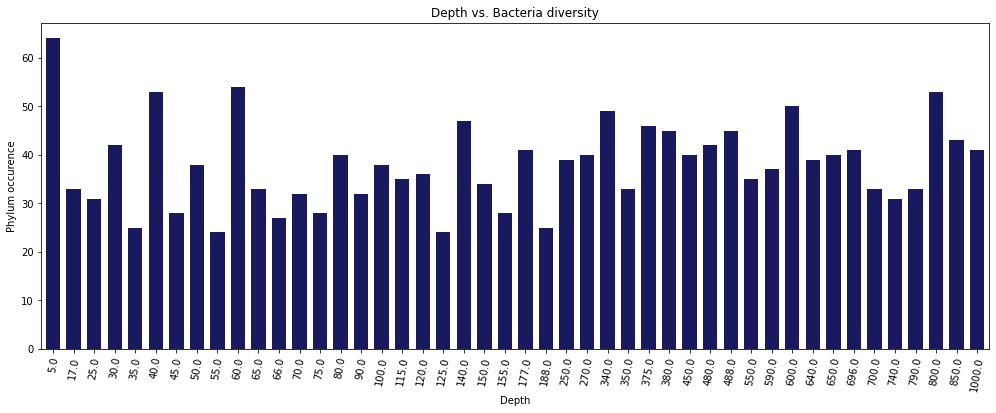

In [280]:
dataset.groupby('deep')['phylum'].count().plot('bar', 
                                                    colormap='seismic', 
                                                    width=0.7, alpha=0.9, 
                                                    figsize=(17,6))
plt.ylabel('Phylum occurence')
plt.xlabel('Depth')
plt.xticks(rotation=80)
plt.title('Depth vs. Bacteria diversity')
plt.show()

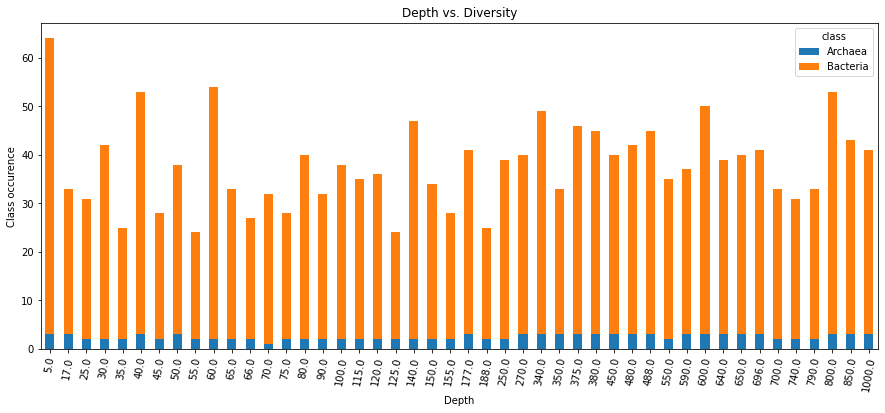

In [281]:
dataset.groupby(['deep','class']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,6))
plt.ylabel('Class occurence')
plt.xlabel('Depth')
plt.xticks(rotation=80)
plt.title('Depth vs. Diversity')
plt.show()


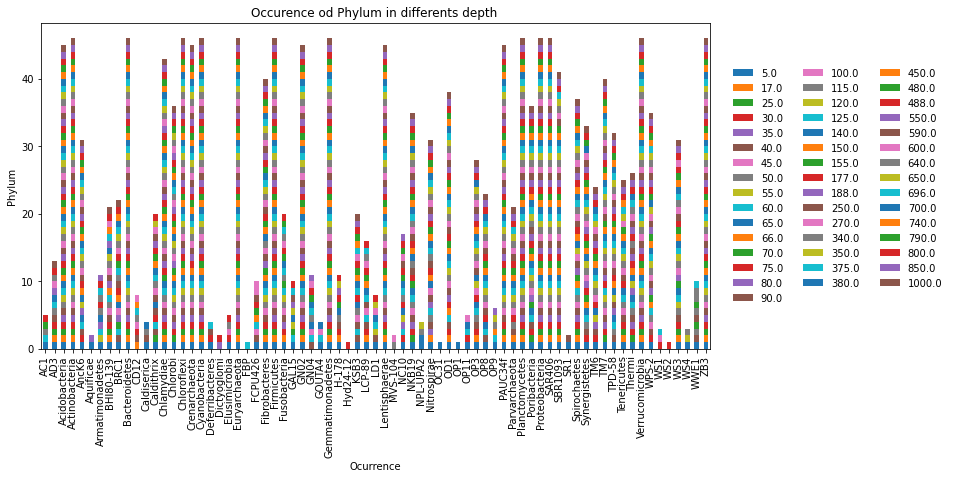

In [282]:
dataset.groupby(['phylum','deep']).size().unstack().plot(kind='bar',stacked=True, figsize=(12,6))
plt.legend(frameon=False, ncol=3, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.ylabel('Phylum')
plt.xlabel('Ocurrence')
plt.xticks(rotation=90)
plt.title('Occurence od Phylum in differents depth ')
plt.show()

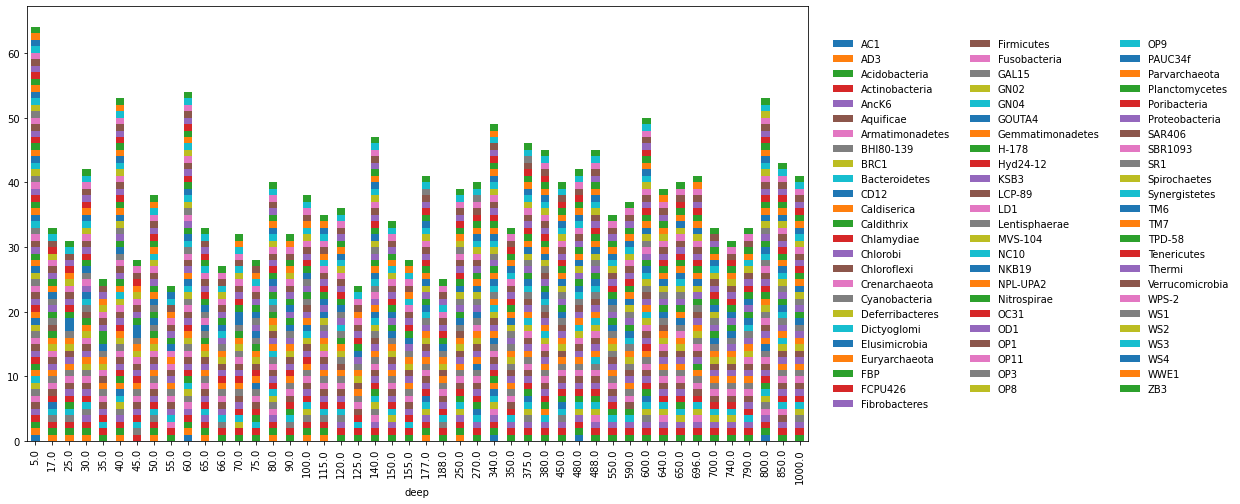

In [283]:

dataset.groupby(['deep','phylum']).size().unstack().plot(kind='bar',stacked=True, figsize=(14,8))
plt.legend(frameon=False, ncol=3, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.show()

In [319]:
gk = dataset.groupby('phylum')
gk.first() 

conc   deep     class
phylum                                        
AC1              1.533462e-07    5.0  Bacteria
AD3              6.081724e-08   25.0  Bacteria
Acidobacteria    2.138001e-08   25.0  Bacteria
Actinobacteria   3.537747e-06   25.0  Bacteria
AncK6            2.966209e-08    5.0  Bacteria
Aquificae        2.038309e-08    5.0  Bacteria
Armatimonadetes  2.727815e-08    5.0  Bacteria
BHI80-139        7.852148e-08   25.0  Bacteria
BRC1             4.329254e-08    5.0  Bacteria
Bacteroidetes    1.441607e-06   25.0  Bacteria
CD12             1.477411e-07   40.0  Bacteria
Caldiserica      1.550529e-08    5.0  Bacteria
Caldithrix       1.722649e-08   25.0  Bacteria
Chlamydiae       4.364863e-08   25.0  Bacteria
Chlorobi         1.692029e-08   25.0  Bacteria
Chloroflexi      3.067538e-06   25.0  Bacteria
Crenarchaeota    2.160390e-06   25.0   Archaea
Cyanobacteria    1.655158e-05   25.0  Bacteria
Deferribacteres  3.907204e-08    5.0  Bacteria
Dictyoglomi      1.507686e-08  488.0  Bacteria
Elusimicrobia    3.984149e-08    5.0  Bacteria
Euryarchaeota    1.065557e-05   25.0   Archaea
FBP              1.758269e-08  696.0  Bacteria
FCPU426          3.425542e-08    5.0  Bacteria
Fibrobacteres    2.276452e-08   25.0  Bacteria
Firmicutes       2.877337e-07   25.0  Bacteria
Fusobacteria     3.280418e-08    5.0  Bacteria
GAL15            2.828613e-08    5.0  Bacteria
GN02             5.162088e-08   25.0  Bacteria
GN04             1.662960e-08   40.0  Bacteria
...                       ...    ...       ...
OC31             1.561752e-08    5.0  Bacteria
OD1              1.268106e-07    5.0  Bacteria
OP1              1.473368e-07  380.0  Bacteria
OP11             1.498107e-08    5.0  Bacteria
OP3              3.809774e-08    5.0  Bacteria
OP8              2.726671e-08    5.0  Bacteria
OP9              2.901780e-08    5.0  Bacteria
PAUC34f          3.250435e-07   25.0  Bacteria
Parvarchaeota    4.060773e-08    5.0   Archaea
Planctomycetes   6.012823e-07   25.0  Bacteria
Poribacteria     3.322818e-08   25.0  Bacteria
Proteobacteria   3.606998e-06   25.0  Bacteria
SAR406           7.266039e-06   25.0  Bacteria
SBR1093          9.015585e-07   25.0  Bacteria
SR1              1.874493e-08    5.0  Bacteria
Spirochaetes     8.845369e-08   25.0  Bacteria
Synergistetes    3.429490e-08    5.0  Bacteria
TM6              3.919864e-08    5.0  Bacteria
TM7              1.722649e-08   25.0  Bacteria
TPD-58           1.548324e-07    5.0  Bacteria
Tenericutes      1.837665e-07   25.0  Bacteria
Thermi           3.322818e-08   25.0  Bacteria
Verrucomicrobia  1.385998e-06   25.0  Bacteria
WPS-2            1.283019e-07    5.0  Bacteria
WS1              5.140104e-08  375.0  Bacteria
WS2              1.518996e-08  800.0  Bacteria
WS3              2.786268e-08   25.0  Bacteria
WS4              1.874493e-08    5.0  Bacteria
WWE1             4.226508e-08    5.0  Bacteria
ZB3              1.641925e-07   25.0  Bacteria

[73 rows x 3 columns]

In [324]:
cyanobacteria = gk.get_group('Cyanobacteria')
firmicutes = gk.get_group('Firmicutes')

### Estimating Spearman Correlation

In [305]:
#Ex 1: Cyanobacteria
rho, p = spearmanr(cyanobacteria['deep'], cyanobacteria['conc'] )
print ('- Spearman''´s' ' coefficient for cyanobacteria:')
print('rho_cyanobacteria:', rho)
print('p_cyanobacteria:',p)

- Spearman´s coefficient for cyanobacteria:
rho_cyanobacteria: -0.7091581868640147
p_cyanobacteria: 3.4655084350363494e-08


In [306]:
#Ex 2: Firmicutes
rho, p = spearmanr(firmicutes['deep'], firmicutes['conc'] )
print ('- Spearman''´s' ' coefficients for firmicutes:')
print('rho_firmicutes:', rho)
print('p_firmicutes:',p)

- Spearman´s coefficients for firmicutes:
rho_firmicutes: -0.555349984582177
p_firmicutes: 6.175394683491683e-05


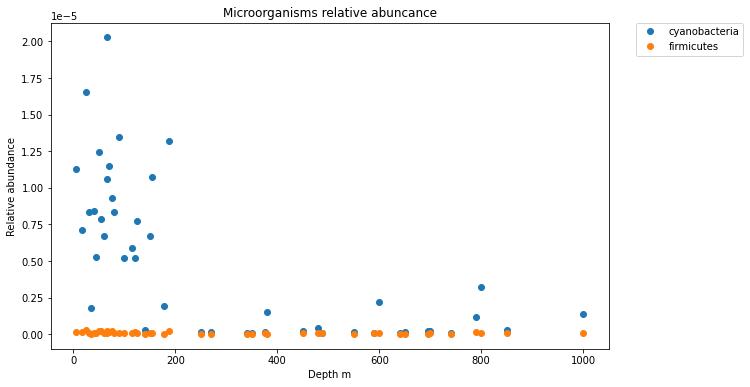

In [307]:
plt.figure(figsize=(10,6))
plt.plot(cyanobacteria['deep'], cyanobacteria['conc'],'o', label='cyanobacteria')
plt.plot(firmicutes['deep'], firmicutes['conc'],'o', label='firmicutes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Depth m")
plt.ylabel("Relative abundance")
plt.title('Microorganisms relative abuncance')
plt.savefig(fname='test.png',  bbox_inches='tight', dpi=400)
plt.show()